# ARMA Models - Lab

## Introduction

In this lab, you'll practice your knowledge the Autoregressive (AR), the Moving Average (MA) model, and the combined ARMA model.

## Objectives

You will be able to:
- Understand and explain what a Autoregressive model is
- Understand and explain what a Moving Average model is
- Understand and apply the mathematical formulations for Autoregressive and Moving Average models
- Understand how AR and MA can be combined in ARMA models

## Generate an AR model of the first order with $\phi = 0.7$

In [27]:
#import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams


Recall that the AR model has the following formula:

$$Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$$

This means that:

$$Y_1 = \mu + \phi * Y_{0}+\epsilon_1$$
$$Y_2 = \mu + \phi * (\text{mean-centered version of } Y_1) +\epsilon_2$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 2. Make sure you have a daily datetime index ranging from January 2017 until the end of March 2018. Assume that $\mu=5$ and $Y_0= 8$.


In [19]:
# keep the random seed
np.random.seed(11225)

# create a series with the specified dates
dates = pd.date_range(start='2017-01-01', end='2018-03-31')
len(dates)

455

In [20]:
# Create error
error = np.random.normal(loc=0, scale=2, size=455)

In [21]:
# store the parameters
Y = 8
mu = 5

In [32]:
# generate the time series according to the formula
y_values = []

for i in range(0, len(dates)):
    Y_t =  mu + 0.7*Y + error[i]
    y_values.append(Y_t)
    Y = Y_t - mu
    

Plot the time series and verify what you see

In [33]:
# plot here
df = pd.DataFrame([dates, y_values]).transpose()
df.columns = ['Date', 'Y']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')
df.set_index('Date', inplace=True)
df.head()

,Y
Date,
2017-01-01,18.5612
2017-01-02,12.1776
2017-01-03,11.2656
2017-01-04,5.44296
2017-01-05,8.3374


Text(0.5, 1.0, 'AR Model')

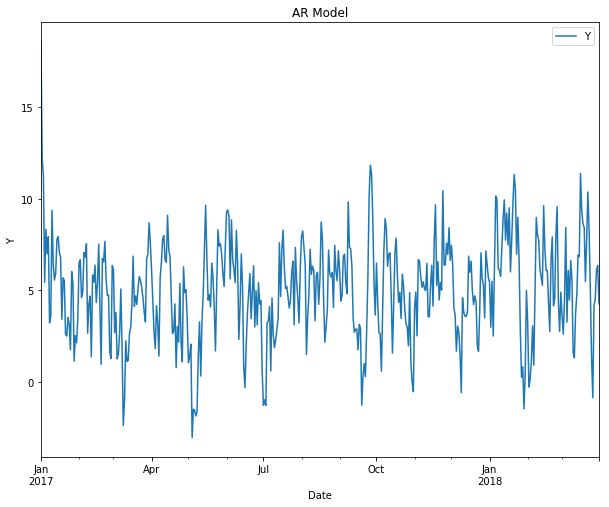

In [34]:
df.plot(figsize=(10,8))
plt.ylabel('Y')
plt.title('AR Model')

## Look at the ACF and PACF of your model and write down your conclusions

We recommend to use `plot_acf` in statsmodels instead of the pandas ACF variant.

In [35]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf


TypeError: ufunc 'multiply' output (typecode 'O') could not be coerced to provided output parameter (typecode 'd') according to the casting rule ''same_kind''

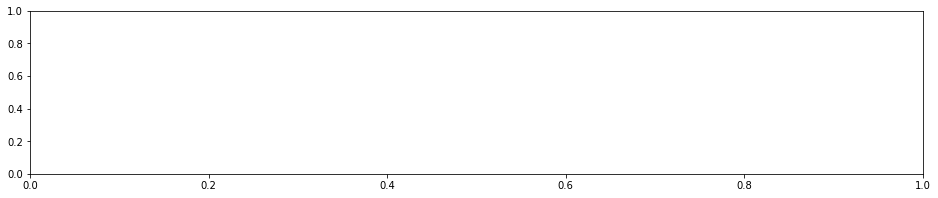

In [47]:
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(df, ax=ax, lags = 40);

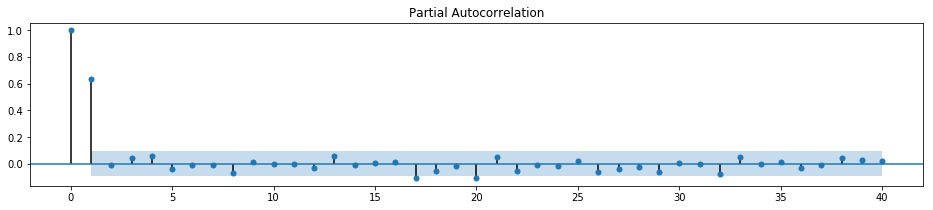

In [46]:
fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(df, ax=ax, lags = 40);

## Check your model with ARMA in statsmodels

Statsmodels also has a tool that fits ARMA models on time series. The only thing you have to do is provide the number of orders for AR vs MA. Have a look at the code below, and the output of the code. Make sure that the output for the $\phi$ parameter and $\mu$ is as you'd expect!

In [57]:
series = df['Y']
series = np.array(series)
type(series)

numpy.ndarray

In [58]:
# assuming your time series are stored in an object "series"
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(series, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  455
Model:                     ARMA(1, 0)   Log Likelihood                -976.662
Method:                       css-mle   S.D. of innovations              2.069
Date:                Thu, 26 Sep 2019   AIC                           1959.324
Time:                        10:55:03   BIC                           1971.685
Sample:                             0   HQIC                          1964.194
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0345      0.293     17.160      0.000       4.460       5.610
ar.L1.y        0.6707      0.036     18.444      0.000       0.599       0.742
                                    Roots           

## Generate an MA model of the first order with $\theta = 0.9$

Recall that the MA model has the following formula:

$$Y_t = \mu +\epsilon_t + \theta * \epsilon_{t-1}$$

This means that:

$$Y_1 = \mu + \epsilon_1+  \theta * \epsilon_{0}$$
$$Y_2 = \mu + \epsilon_2+  \theta * \epsilon_{1}$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 4. Make sure you have a daily datetime index is ranging from April 2015 until the end of August 2015. Assume that $\mu=7$.

In [59]:
# keep the random seed
np.random.seed(1234)

# create a series with the specified dates

dates = pd.date_range(start='2015-04-01', end='2015-08-31')

# store the parameters

mu = 7
error = np.random.normal(loc=0, scale=4, size=len(dates))
theta = 0.9

#generate the time series

y_values = []
error_lag = 0

for i in range(0, len(dates)):
    Y = mu + error[i] + theta*error_lag
    y_values.append(Y)
    error_lag = error[i]


In [61]:
# Plot the time series

df = pd.DataFrame([dates, y_values]).transpose()
df.columns = ['Date', 'Y']
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')
df.set_index('Date', inplace=True)
df.head()

,Y
Date,
2015-04-01,8.88574
2015-04-02,3.93326
2015-04-03,8.44332
2015-04-04,10.9071
2015-04-05,2.9921


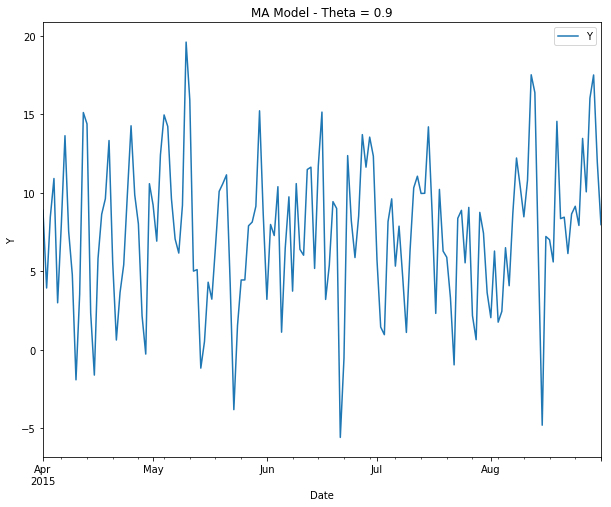

In [62]:
df.plot(figsize=(10,8))
plt.title('MA Model - Theta = 0.9')
plt.ylabel('Y')
plt.show()

## Look at the ACF and PACF of your model and write down your conclusions

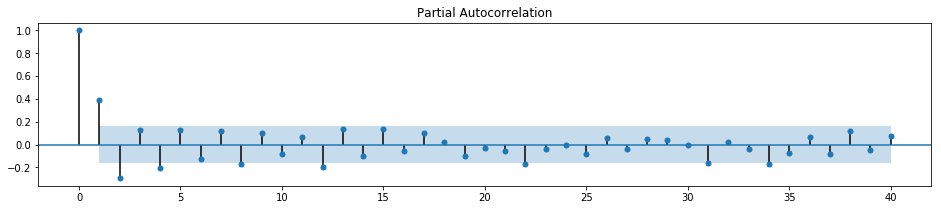

In [63]:
# plots here
fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(df, ax=ax, lags = 40);

TypeError: ufunc 'multiply' output (typecode 'O') could not be coerced to provided output parameter (typecode 'd') according to the casting rule ''same_kind''

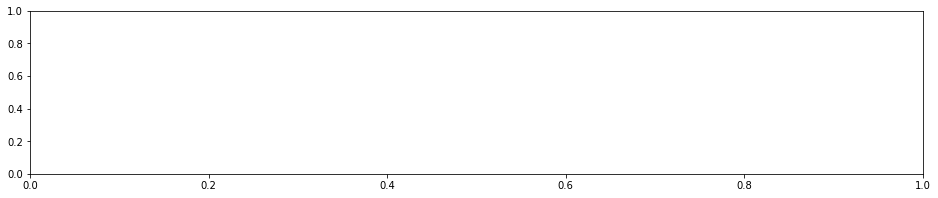

In [65]:
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(df, ax=ax);

## Check your model with ARMA in statsmodels

Repeat what you did for your AR model but now for your MA model to verify the parameters are estimated correctly.

In [67]:
# Fit an AR(1) model to the first simulated data
series = np.array(df['Y'])

# Print out summary information on the fit

mod_arma = ARMA(series, order=(0,1))
res_arma = mod_arma.fit()

# Fit an MA(1) model to the first simulated data
print(res_arma.summary())
print(res_arma.params)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  153
Model:                     ARMA(0, 1)   Log Likelihood                -425.916
Method:                       css-mle   S.D. of innovations              3.897
Date:                Thu, 26 Sep 2019   AIC                            857.832
Time:                        11:05:31   BIC                            866.924
Sample:                             0   HQIC                           861.525
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5167      0.589     12.763      0.000       6.362       8.671
ma.L1.y        0.8753      0.050     17.634      0.000       0.778       0.973
                                    Roots           

## Create a model for the 400m data set

Import the data set containing the historical running times for the men's 400m on the Olympic games.

In [68]:
# the data is in "winning_400m.csv"
df = pd.read_csv('winning_400m.csv')
df.head()

,year,winning_times
0,1900,49.4
1,1904,49.2
2,1908,50.0
3,1912,48.2
4,1920,49.6


In [69]:
df['year'] = pd.to_datetime(df['year'], format='%Y')
df.set_index('year', inplace=True)
df.head()

,winning_times
year,
1900-01-01,49.4
1904-01-01,49.2
1908-01-01,50.0
1912-01-01,48.2
1920-01-01,49.6


Plot the data

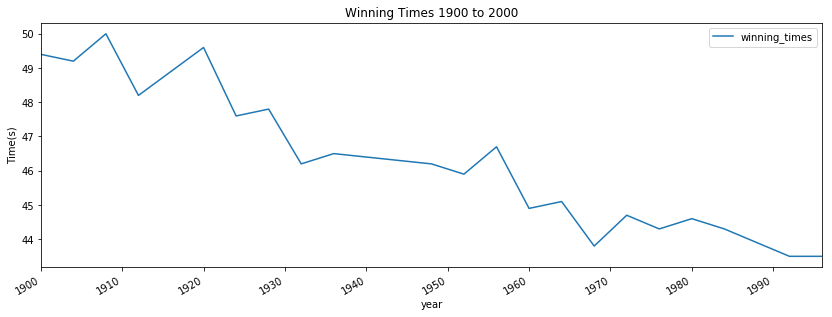

In [72]:
# your code here
df.plot()
plt.title('Winning Times 1900 to 2000')
plt.ylabel('Time(s)')
plt.show()


Difference the data to get a stationary time series. Make sure to remove the first NaN value.

In [75]:
# your code here
df_diff = df.diff(periods=1)
df_diff.dropna(inplace=True)
df_diff.head()

,winning_times
year,
1904-01-01,-0.2
1908-01-01,0.8
1912-01-01,-1.8
1920-01-01,1.4
1924-01-01,-2.0


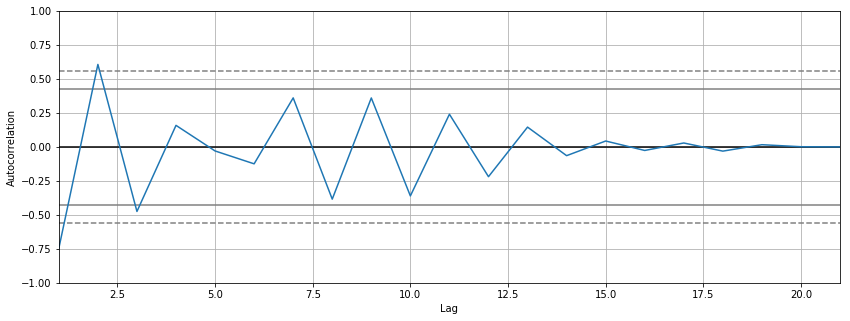

In [76]:
# Look at ACF and PACF
from pandas.plotting import autocorrelation_plot
pd.plotting.autocorrelation_plot(df_diff)

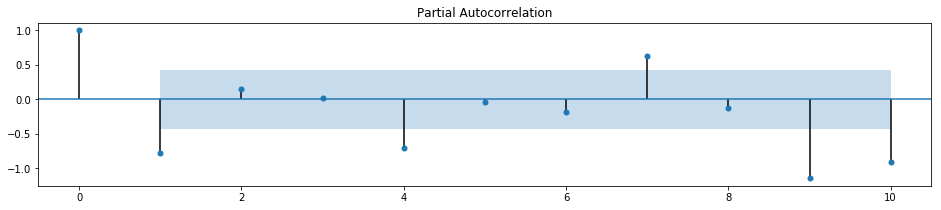

In [78]:
fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(df_diff, ax=ax, lags = 10);

Based on the ACF and PACF, fit an arma model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates.

In [83]:
# your code here
# Fit an AR(1) model to the first simulated data
series = np.array(df_diff['winning_times'])

# Print out summary information on the fit

mod_arma = ARMA(series, order=(2,2))
res_arma = mod_arma.fit()

# Fit an MA(1) model to the first simulated data
print(res_arma.summary())
print(res_arma.params)


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   21
Model:                     ARMA(2, 2)   Log Likelihood                 -16.472
Method:                       css-mle   S.D. of innovations              0.461
Date:                Thu, 26 Sep 2019   AIC                             44.943
Time:                        11:14:30   BIC                             51.210
Sample:                             0   HQIC                            46.303
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2718      0.098     -2.779      0.013      -0.463      -0.080
ar.L1.y       -1.7575      0.097    -18.070      0.000      -1.948      -1.567
ar.L2.y       -0.9182      0.092    -10.002      0.0

In [ ]:
# Try another one

## What is your final model? Why did you pick this model?

In [ ]:
# Your comments here

## Summary

Great! Now that you know the ins and outs of ARMA models and you've practiced your modeling knowledge.